# 회귀
- 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고함. 지도학습
- 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_excel('dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [20]:
ndf.horsepower.replace('?',np.nan,inplace=True)

In [21]:
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)

In [22]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


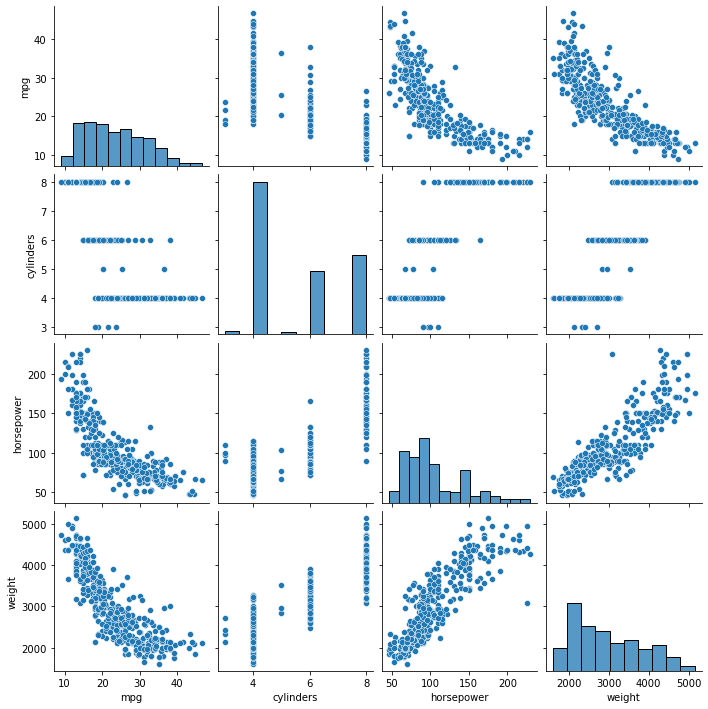

In [23]:
sns.pairplot(ndf)

In [25]:
# 변수(속성) 선택
X = ndf[['weight']] # 독립변수
Y = ndf['mpg'] # 종속변수
# x = df, y = series 여야함
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=11)


In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
y_preds = lr.predict(X_test)
y_preds[:5]


array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907])

# 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
- R-square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로함.  

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test,y_preds) # 예측값과 실제값의 오차를 확인
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,y_preds)
print('MSE : {:.3f}, RMSE : {:.3f}, R2 Score: {:.3f}'.format(mse,rmse,r2))

MSE : 22.169, RMSE : 4.708, R2 Score: 0.641


In [46]:
print('기울기 a :',lr.coef_)
print('절편 b :',lr.intercept_)
# 기울기 계수가 낮다
# 상관관계가 높은데 기울기가 낮음 = 단위가 다르다 1000:10 비율

기울기 a : [-0.00762163]
절편 b : 45.97121770475769


<AxesSubplot:ylabel='Frequency'>

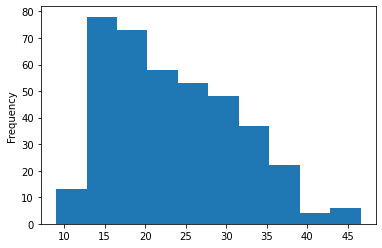

In [47]:
Y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

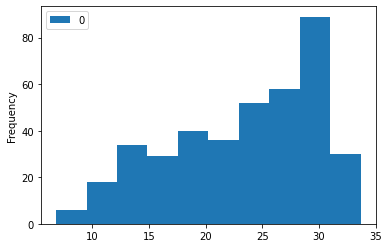

In [50]:
y_hat = lr.predict(X)
pd.DataFrame(y_hat).plot(kind='hist')

In [ ]:
# 실제 값과 예측 값에 차이가 심히다

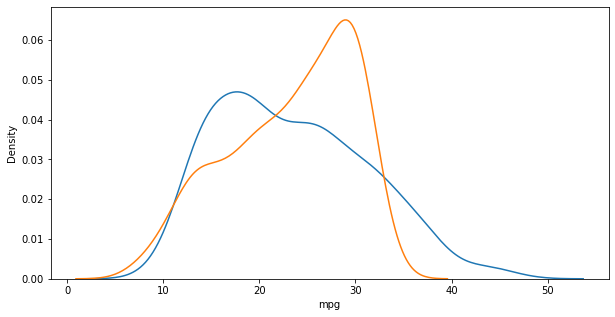

In [52]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')


### 다항회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선형태의 회귀선을 표현할 수 있다.
- 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘.
- 다항 회귀도 선형회귀이다. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관하다.

In [54]:
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [65]:
X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [66]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변환

print(X_train.shape) # x
print(X_train_poly.shape) # x , x^2, x+1
print(X_train_poly[:5])

(274, 1)
(274, 3)
[[1.0000000e+00 2.7200000e+03 7.3984000e+06]
 [1.0000000e+00 3.9070000e+03 1.5264649e+07]
 [1.0000000e+00 2.3000000e+03 5.2900000e+06]
 [1.0000000e+00 2.0650000e+03 4.2642250e+06]
 [1.0000000e+00 4.6330000e+03 2.1464689e+07]]


In [76]:
# r2_score() 사용
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)

y2_preds = pr.predict(X_test_poly)
r2s = r2_score(y_test,y2_preds)
r2s

0.6721104316263575

In [75]:
# score 사용
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.6721104316263575

Text(0, 0.5, 'mpg')

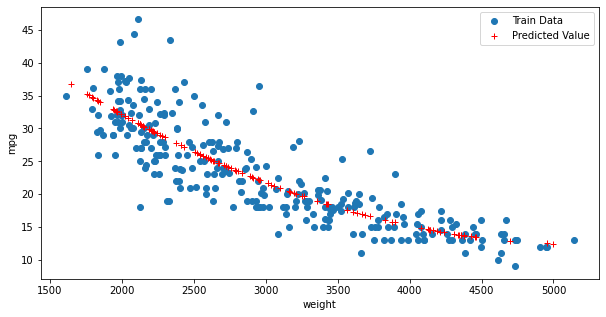

In [68]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

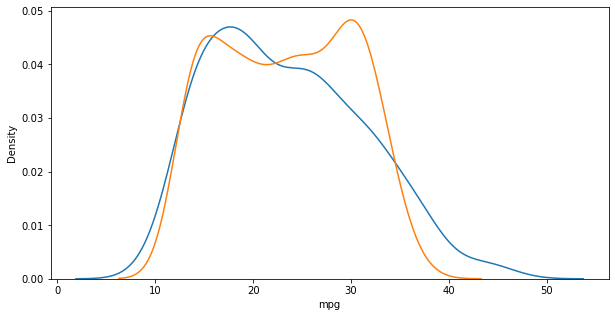

In [77]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')


# 다중 회귀분석
- 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [80]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [109]:
X = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE : {:.3f}, RMSE : {:.3f}, R2 Score: {:.3f}'.format(mse,rmse,r2))

MSE : 16.741, RMSE : 4.092, R2 Score: 0.723


,cylinders,horsepower,weight
240,4,78.0,2190
272,4,85.0,2855
215,8,150.0,3755
362,6,120.0,2930
58,4,80.0,2126
...,...,...,...
67,8,208.0,4633
164,6,110.0,3039
103,8,150.0,4997
172,4,71.0,2223


In [110]:
print('X변수의 계수 :', lr.coef_)
print('상수항 :', lr.intercept_)

X변수의 계수 : [-0.57883888 -0.02621466 -0.00579192]
상수항 : 46.57452932945243


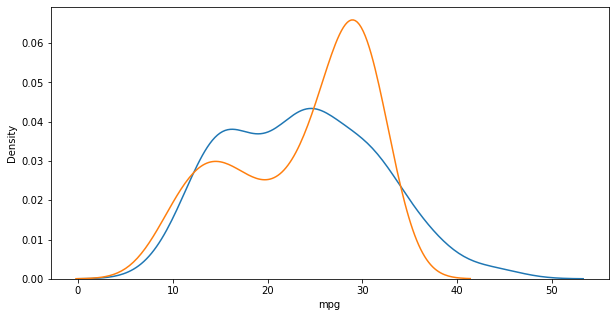

In [112]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test,hist=False,label='y_test')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')


In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data=ndf_ms,columns=ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [135]:
X = ndf_ms_df[['cylinders','horsepower','weight']]
y = ndf_ms_df['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE : {:.3f}, RMSE : {:.3f}, R2 Score: {:.3f}'.format(mse,rmse,r2))


MSE : 0.014, RMSE : 0.118, R2 Score: 0.680


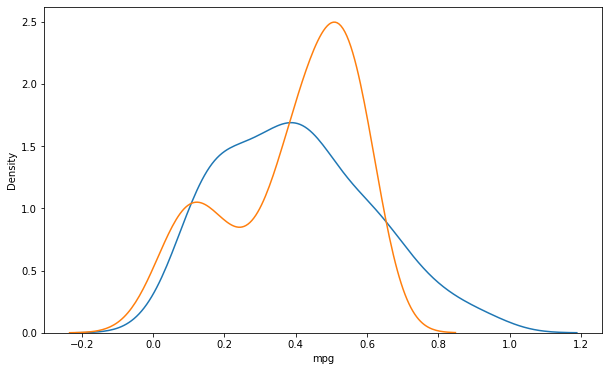

In [136]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,6))
ax1 = sns.distplot(y_test,hist=False,label='y_test')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')

<AxesSubplot:xlabel='mpg', ylabel='Density'>

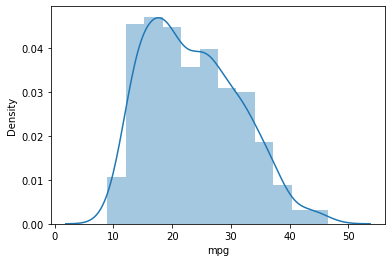

In [137]:
sns.distplot(ndf.mpg)

<AxesSubplot:ylabel='Density'>

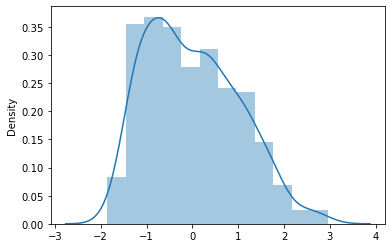

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndf_ss = scaler.fit_transform(ndf[['mpg']])

ndf_ss_df = pd.DataFrame(data=ndf_ss)

sns.distplot(ndf_ss_df)

https://steadiness-193.tistory.com/224

<AxesSubplot:xlabel='mpg', ylabel='Density'>

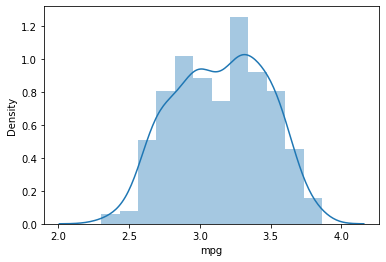

In [152]:
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)

# 과제
로그 변환된 종속변수를 적용하여 다중회귀 분석 결과를 평가하세요  
(r-square, 로그 변환된 MSE, RMSE)

In [182]:
X = ndf[['cylinders','horsepower','weight']]
y = log_mpg

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}, R2 Score : {r2:.3f}')

MSE : 0.025, RMSE : 0.157, R2 Score : 0.791


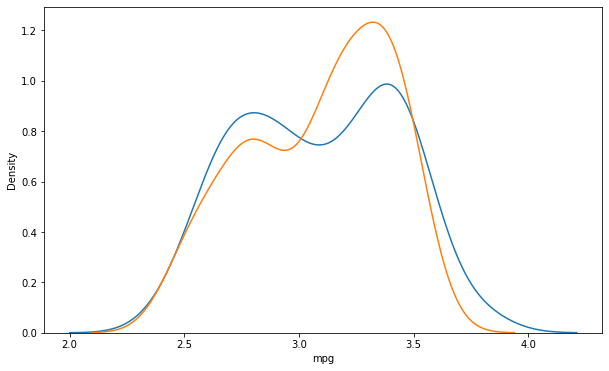

In [183]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,6))
ax1 = sns.distplot(y_test,hist=False,label='y_test')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')